In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns

In [104]:
df = pd.read_csv("../data/composite_stocks.csv")
df.set_index("date", inplace=True)

In [105]:
df['market_value'] = df.DJI
del df['DJI']
del df['GSPC']
del df['IXIC']

In [106]:
size = int(len(df)*0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [107]:
df_train['returns'] = df.market_value.pct_change(1)*100

C:\Users\andyz\AppData\Local\Temp\ipykernel_35116\2483729404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['returns'] = df.market_value.pct_change(1)*100


In [108]:
df_train

,market_value,returns
date,,
2023-01-03,33136.371094,NaN
2023-01-04,33269.769531,0.402574
2023-01-05,32930.078125,-1.021021
2023-01-06,33630.609375,2.127329
2023-01-09,33517.648438,-0.335887
...,...,...
2023-10-12,33631.140625,-0.513921
2023-10-13,33670.289062,0.116405
2023-10-16,33984.539062,0.933315


In [114]:
# LLR Test
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

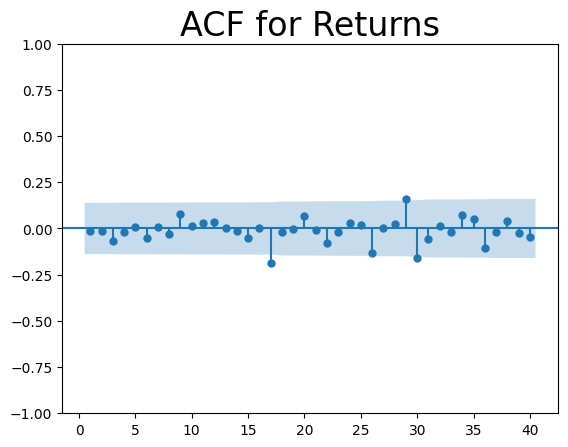

In [110]:
sgt.plot_acf(df_train.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns", size=24)
plt.show()

In [125]:
model_ret_ma_1 = ARIMA(df_train.returns[1:], order=(0, 0, 1))
results_ret_ma_1 = model_ret_ma_1.fit()
print(results_ret_ma_1.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  199
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -218.913
Date:                Thu, 04 Apr 2024   AIC                            443.827
Time:                        04:31:07   BIC                            453.707
Sample:                             0   HQIC                           447.826
                                - 199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0106      0.051      0.208      0.835      -0.089       0.111
ma.L1         -0.0144      0.073     -0.197      0.844      -0.158       0.129
sigma2         0.5285      0.052     10.161      0.0

c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [128]:
model_ret_ma_2 = ARIMA(df_train.returns[1:], order=(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  199
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -218.883
Date:                Thu, 04 Apr 2024   AIC                            445.767
Time:                        04:31:49   BIC                            458.940
Sample:                             0   HQIC                           451.098
                                - 199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.050      0.213      0.831      -0.088       0.110
ma.L1         -0.0167      0.073     -0.228      0.820      -0.160       0.127
ma.L2         -0.0180      0.067     -0.268      0.7

c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [130]:
model_ret_ma_3 = ARIMA(df_train.returns[1:], order=(0,0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  199
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -218.315
Date:                Thu, 04 Apr 2024   AIC                            446.631
Time:                        04:33:06   BIC                            463.097
Sample:                             0   HQIC                           453.295
                                - 199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0101      0.046      0.218      0.828      -0.081       0.101
ma.L1         -0.0181      0.073     -0.249      0.803      -0.160       0.124
ma.L2         -0.0139      0.070     -0.197      0.8

c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [132]:
model_ret_ma_3 = ARIMA(df_train.returns[1:], order=(0,0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  199
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -218.315
Date:                Thu, 04 Apr 2024   AIC                            446.631
Time:                        04:33:26   BIC                            463.097
Sample:                             0   HQIC                           453.295
                                - 199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0101      0.046      0.218      0.828      -0.081       0.101
ma.L1         -0.0181      0.073     -0.249      0.803      -0.160       0.124
ma.L2         -0.0139      0.070     -0.197      0.8

In [136]:
model_ret_ma_4 = ARIMA(df_train.returns[1:], order=(0,0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  199
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -218.287
Date:                Thu, 04 Apr 2024   AIC                            448.574
Time:                        04:36:43   BIC                            468.334
Sample:                             0   HQIC                           456.571
                                - 199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.046      0.216      0.829      -0.080       0.100
ma.L1         -0.0165      0.073     -0.225      0.822      -0.160       0.127
ma.L2         -0.0148      0.071     -0.210      0.8

In [137]:
model_ret_ma_5 = ARIMA(df_train.returns[1:], order=(0,0,5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  199
Model:                 ARIMA(0, 0, 5)   Log Likelihood                -218.280
Date:                Thu, 04 Apr 2024   AIC                            450.560
Time:                        04:37:08   BIC                            473.613
Sample:                             0   HQIC                           459.890
                                - 199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.046      0.216      0.829      -0.081       0.101
ma.L1         -0.0159      0.074     -0.214      0.831      -0.162       0.130
ma.L2         -0.0159      0.071     -0.223      0.8

In [139]:
model_ret_ma_6 = ARIMA(df_train.returns[1:], order=(0,0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  199
Model:                 ARIMA(0, 0, 6)   Log Likelihood                -218.120
Date:                Thu, 04 Apr 2024   AIC                            452.240
Time:                        04:37:57   BIC                            478.587
Sample:                             0   HQIC                           462.903
                                - 199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0096      0.045      0.211      0.833      -0.079       0.099
ma.L1         -0.0152      0.076     -0.199      0.842      -0.164       0.134
ma.L2         -0.0178      0.071     -0.249      0.8

In [140]:
model_ret_ma_7 = ARIMA(df_train.returns[1:], order=(0,0,7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  199
Model:                 ARIMA(0, 0, 7)   Log Likelihood                -218.102
Date:                Thu, 04 Apr 2024   AIC                            454.205
Time:                        04:38:34   BIC                            483.845
Sample:                             0   HQIC                           466.201
                                - 199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0098      0.047      0.209      0.834      -0.082       0.102
ma.L1         -0.0149      0.076     -0.195      0.845      -0.164       0.134
ma.L2         -0.0200      0.071     -0.280      0.7

In [144]:
model_ret_ma_8 = ARIMA(df_train.returns[1:], order=(0,0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  199
Model:                 ARIMA(0, 0, 8)   Log Likelihood                -218.018
Date:                Thu, 04 Apr 2024   AIC                            456.037
Time:                        04:39:46   BIC                            488.970
Sample:                             0   HQIC                           469.366
                                - 199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0092      0.047      0.196      0.844      -0.082       0.101
ma.L1         -0.0106      0.077     -0.137      0.891      -0.162       0.141
ma.L2         -0.0169      0.073     -0.232      0.8

In [162]:
LLR_test(model_ret_ma_2, model_ret_ma_3, DF = 1)

0.286

In [163]:
df_train['res_ret_ma_3'] = results_ret_ma_3.resid[1:]

C:\Users\andyz\AppData\Local\Temp\ipykernel_35116\3897567735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['res_ret_ma_3'] = results_ret_ma_3.resid[1:]


In [167]:
print("The mean of the residuals is " + str(round(df_train.res_ret_ma_3.mean(),3)) + "\nThe variance of the residuals is " + str(round(df_train.res_ret_ma_3.var(),3)))

The mean of the residuals is -0.001
The variance of the residuals is 0.53


In [170]:
round(sqrt(df_train.res_ret_ma_3.var()),3)

0.728

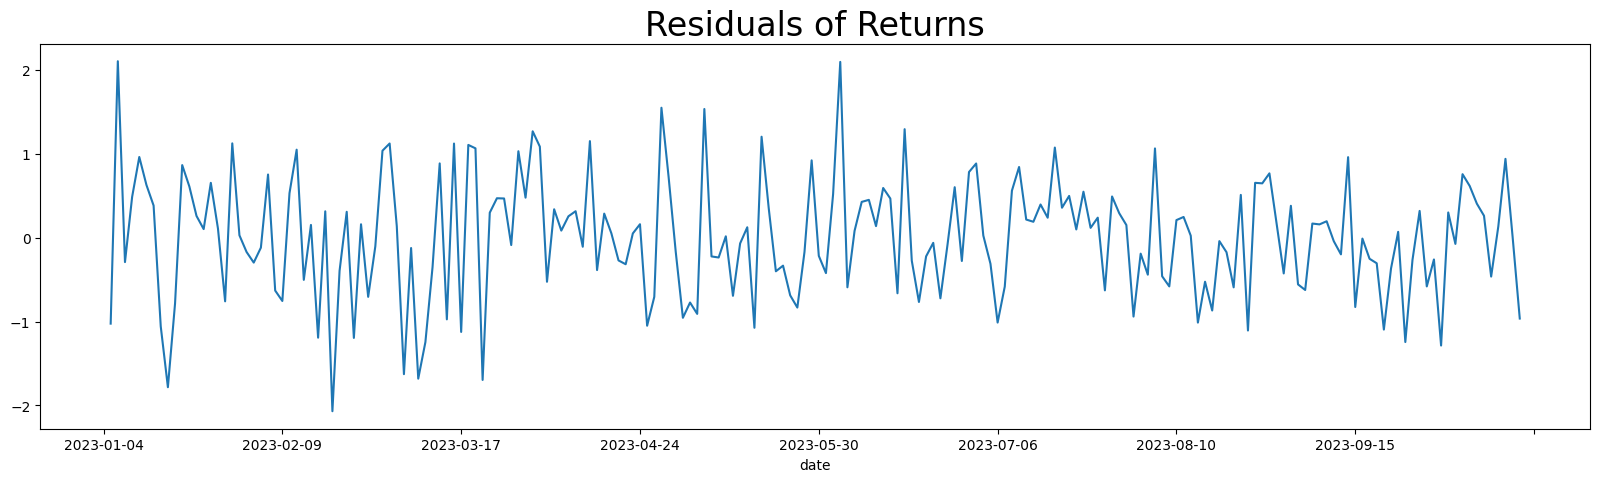

In [171]:
df_train.res_ret_ma_3[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [173]:
sts.adfuller(df_train.res_ret_ma_3[2:])

(-13.895238494233698,
 5.868011383044488e-26,
 0,
 197,
 {'1%': -3.463987334463603,
  '5%': -2.8763259091636213,
  '10%': -2.5746515171738515},
 393.42319226005304)

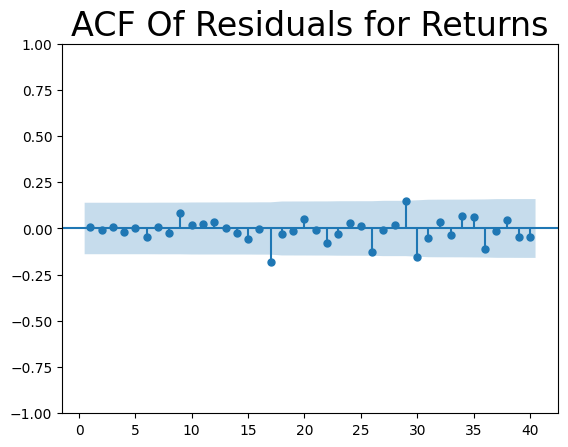

In [174]:
sgt.plot_acf(df_train.res_ret_ma_3[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

In [178]:
bench_ret = df_train.returns.iloc[1]
df_train['norm_ret'] = df_train.returns.div(bench_ret).mul(100)

C:\Users\andyz\AppData\Local\Temp\ipykernel_35116\3878954952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['norm_ret'] = df_train.returns.div(bench_ret).mul(100)


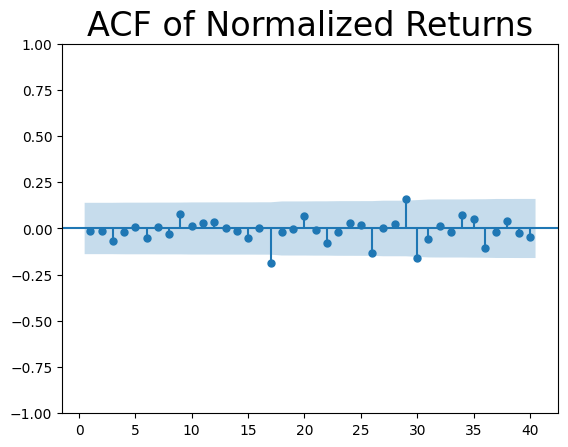

In [179]:
sgt.plot_acf(df_train.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns",size=24)
plt.show()

In [181]:
model_norm_ret_ma_3 = ARIMA(df_train.norm_ret[1:], order=(0,0,3))
results_norm_ret_ma_3 = model_norm_ret_ma_3.fit()
results_norm_ret_ma_3.summary()

c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                  199
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1315.810
Date:                Thu, 04 Apr 2024   AIC                           2641.619
Time:                        04:54:42   BIC                           2658.086
Sample:                             0   HQIC                          2648.284
                                - 199                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5557     11.528      0.222      0.825     -20.038      25.150
ma.L1         -0.0181      0.073     -0.249      0.803      -0.160       0.124
ma.L2         -0.0139      0.070     -0.197      0.844      -0.152       0.124
ma.L3         -0.0814      0.069     -1.178      0.239      -0.217       0.054
sigma2      3.241e+04   3244.085      9.991      0.000    2.61e+04    3.88e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.98   Prob(JB):                         0.95
Heteroskedasticity (H):               0.44   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [182]:
df_train['res_norm_ret_ma_3'] = results_ret_ma_3.resid[1:]

C:\Users\andyz\AppData\Local\Temp\ipykernel_35116\2744098896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['res_norm_ret_ma_3'] = results_ret_ma_3.resid[1:]


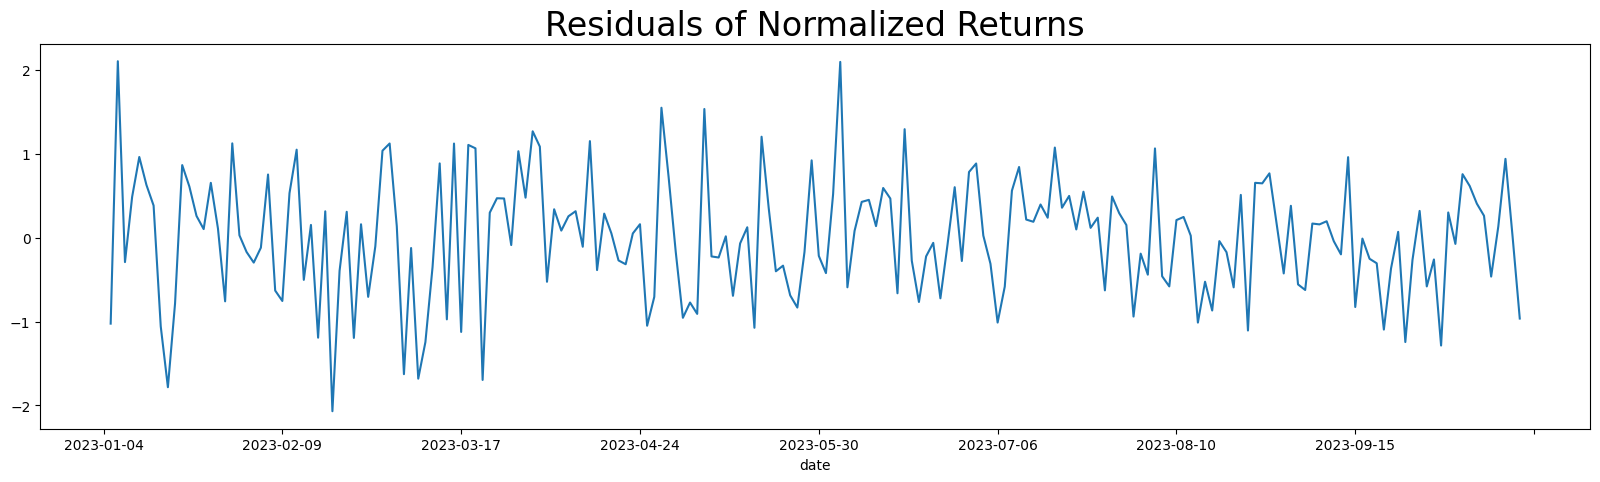

In [183]:
df_train.res_norm_ret_ma_3[1:].plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns",size=24)
plt.show()

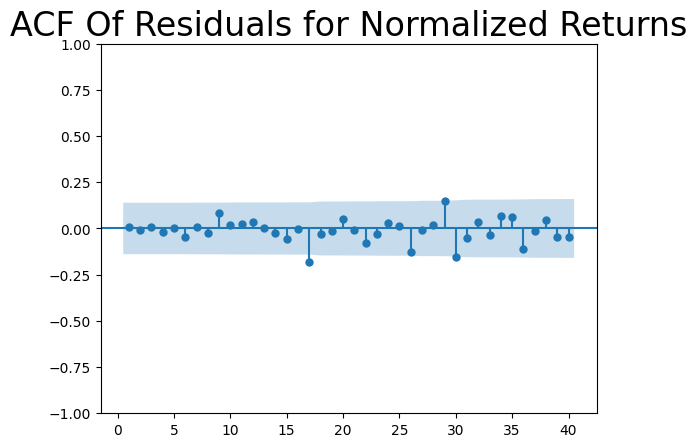

In [184]:
sgt.plot_acf(df_train.res_norm_ret_ma_3[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Normalized Returns",size=24)
plt.show()

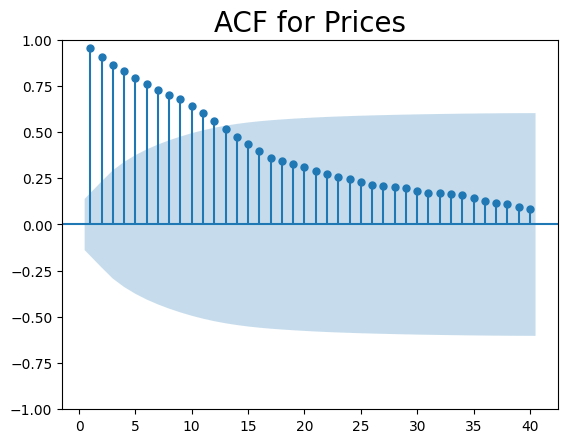

In [185]:
sgt.plot_acf(df_train.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size=20)
plt.show()

In [189]:
model_ma_1 = ARIMA(df_train.market_value, order=(0,0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                  200
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1524.420
Date:                Thu, 04 Apr 2024   AIC                           3054.840
Time:                        04:57:59   BIC                           3064.735
Sample:                             0   HQIC                          3058.845
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.383e+04     64.037    528.259      0.000    3.37e+04     3.4e+04
ma.L1          0.8254      0.036     22.628      0.000       0.754       0.897
sigma2      2.429e+05   2.29e+04     10.603      0.000    1.98e+05    2.88e+05
===================================================================================
Ljung-Box (L1) (Q):                  79.27   Jarque-Bera (JB):                 3.92
Prob(Q):                              0.00   Prob(JB):                         0.14
Heteroskedasticity (H):               1.01   Skew:                            -0.22
Prob(H) (two-sided):                  0.98   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""